In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('marketing_campaign_dataset.csv')

In [ ]:
df

In [12]:
"""
Celda generada por Data Wrangler.
"""
def clean_data(df):
    # Eliminar columna: 'Unnamed: 0'
    df = df.drop(columns=['Unnamed: 0'])
    # Cambia el tipo de columna por int32 para la columna: 'Duration_in_days'
    df = df.astype({'Duration_in_days': 'int32'})
    return df

df = clean_data(df)

In [ ]:
# Verificar si hay valores faltantes
print(df.isnull().sum())

In [ ]:
# Estadísticas básicas
print(df.describe())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras del ROI por canal
sns.barplot(x='Channel_Used', y='ROI', data=df)
plt.title('Distribución del ROI por Canal de Marketing')
plt.show()


In [ ]:
import pandas as pd

# Agrupar por canal de marketing y calcular el promedio de ROI
roi_by_channel = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)

# Mostrar los resultados
print(roi_by_channel)

plt.figure(figsize=(10,6))
sns.barplot(x=roi_by_channel.index, y=roi_by_channel.values)
plt.ylim(4.98, 5.02)  # Ajusta los límites del eje Y
plt.title('Promedio de ROI por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45)
plt.show()



## Para este proyecto, basándonos en los datos disponibles, podemos centrarnos en los siguientes análisis:

* Costo por Adquisición de Cliente (CAC).

* Tasa de Conversión por Canal.

* Duración de la Campaña y su impacto en el ROI.

Estas métricas brindarán una comprensión integral de cómo los diferentes canales de marketing están desempeñándose en términos de costos, conversiones y eficiencia en el uso del tiempo. 

Para comenzar con los análisis de **Costo por Adquisición de Cliente (CAC)**, **Tasa de Conversión por Canal**, y **Duración de la Campaña**, vamos a seguir estos pasos:

### 1. **Costo por Adquisición de Cliente (CAC)**

**Objetivo**: Calcular cuánto cuesta adquirir un cliente por cada campaña.

#### Pasos:

1. Convertimos las columnas necesarias a valores numéricos:
   - `Acquisition_Cost` está en formato de texto (con el símbolo de dólar), por lo que debemos remover el símbolo y convertirlo en un valor numérico.
   - Usamos `Conversion_Rate` para calcular el número de conversiones.

La fórmula del CAC es:
 CAC= (Acquisition_Cost )/(numero de conversiones)

 * donde el numero de converciones se puede calcular como : Conversion_Rate*total audiencia 


## Asignar Audiencia por Canal
Vamos a crear una columna Audience_Size que asignará un valor aleatorio dentro del rango indicado para cada canal.

In [ ]:
import numpy as np

# Definir las audiencias por canal
audience_ranges = {
    'Facebook': (1_000_000, 5_000_000),
    'Website': (100_000, 500_000),
    'Google Ads': (100_000, 1_000_000),
    'Email': (15_000, 25_000),
    'YouTube': (500_000, 5_000_000),
    'Instagram': (500_000, 3_000_000)
}

# Crear la columna de tamaño de audiencia
df['Audience_Size'] = df['Channel_Used'].apply(lambda x: np.random.randint(audience_ranges[x][0], audience_ranges[x][1]))

# Mostrar los primeros registros
df[['Channel_Used', 'Audience_Size']].head()


*Explicación:*
Usamos un diccionario *audience_ranges* para almacenar los rangos de audiencia para cada canal.

La función apply con un lambda recorre la *columna Channel_Used* y asigna un número aleatorio en el rango correspondiente al canal utilizando *np.random.randint*.

In [ ]:
#3. Implementación:


# Limpiar columna Acquisition_Cost
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)


# Calcular el número de conversiones
df['Numero_Conversiones'] = df['Conversion_Rate'] * df['Audience_Size']

# Calcular el CAC
df['CAC'] = df['Acquisition_Cost'] / df['Numero_Conversiones']

# Verificar los resultados
df[['Channel_Used', 'Audience_Size', 'Conversion_Rate', 'Numero_Conversiones', 'Acquisition_Cost', 'CAC']].head()


In [ ]:
#4. Podemos visualizar el CAC por canal con un gráfico de barras:


import matplotlib.pyplot as plt

# Agrupar por canal
cac_por_canal = df.groupby('Channel_Used')['CAC'].mean()

# Crear gráfico de barras
cac_por_canal.plot(kind='bar', title='Costo por Adquisición de Cliente por Canal')
plt.ylabel('Costo por Adquisición (USD)')
plt.show()


### 2. **Tasa de Conversión por Canal**

**Objetivo**: Analizar cuál canal de marketing tiene la mejor tasa de conversión.

#### Pasos:

1. La tasa de conversión está directamente disponible en la columna `Conversion_Rate`.

In [ ]:
#2. Visualización de la tasa de conversión promedio por canal:


# Agrupar por canal
conversion_por_canal = df.groupby('Channel_Used')['Conversion_Rate'].mean()

# Crear gráfico de barras
conversion_por_canal.plot(kind='bar', title='Tasa de Conversión por Canal')
plt.ylabel('Tasa de Conversión (%)')

# Ajustar el eje Y para hacer zoom en las diferencias
plt.ylim(0.075, 0.085)

plt.show()


### 3. **Duración de la Campaña y su Impacto en el ROI**

**Objetivo**: Analizar si la duración de las campañas afecta el ROI.

#### Pasos:
1. Convertir `Duration` a un valor numérico. Por ejemplo, si está en formato "30 days", debemos extraer los días como un número.





In [3]:
# Cambiar el nombre de la columna
df.rename(columns={'Duration': 'Duration_in_days'}, inplace=True)

# Eliminar la palabra 'days' de cada valor de la columna
df['Duration_in_days'] = df['Duration_in_days'].str.replace(' days', '', regex=False)


C:\Users\david\AppData\Local\Temp\ipykernel_5668\3681440394.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Duration_in_days', y='ROI', data=roi_por_duracion, palette='viridis')


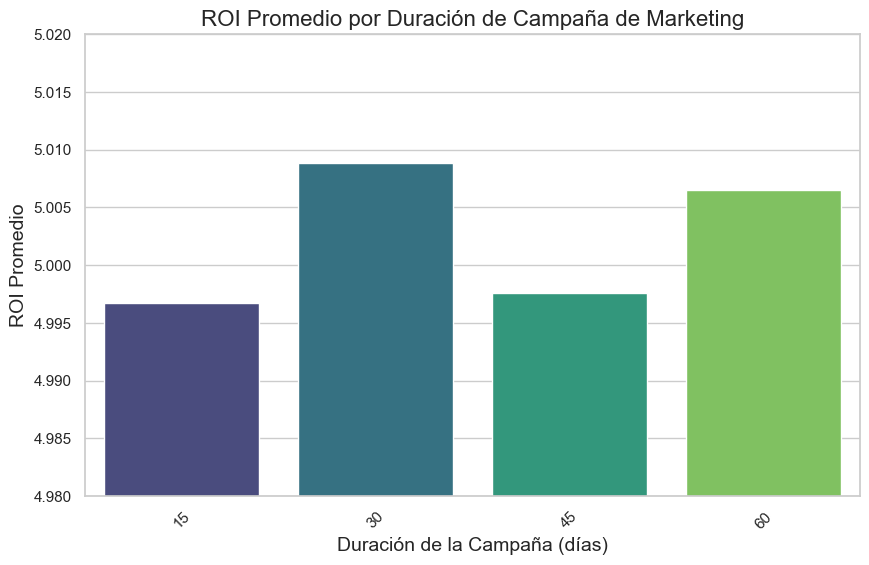

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes un DataFrame llamado df
# Agrupar por la duración de la campaña y calcular el ROI promedio
roi_por_duracion = df.groupby('Duration_in_days')['ROI'].mean().reset_index()

# Ordenar por ROI promedio de mayor a menor
roi_por_duracion = roi_por_duracion.sort_values(by='ROI', ascending=False)

# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Duration_in_days', y='ROI', data=roi_por_duracion, palette='viridis')

# Añadir título y etiquetas
plt.title('ROI Promedio por Duración de Campaña de Marketing', fontsize=16)
plt.xlabel('Duración de la Campaña (días)', fontsize=14)
plt.ylabel('ROI Promedio', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(4.98, 5.02) # Ajustar el límite del eje y

# Mostrar la gráfica
plt.show()




### Próximos pasos:
- Ejecuta este análisis paso a paso y observa los resultados. Podemos ajustar los tamaños de audiencia o la limpieza de los datos según sea necesario.
- Una vez que obtengamos estos resultados, podemos combinar estos análisis en un informe o agregar más visualizaciones para hacer las conclusiones más claras.

In [15]:
df.to_csv('marketing_campaign_dataset.csv', index=False)

In [10]:
roi_por_duracion

,Duration_in_days,ROI
1,30,5.008887
3,60,5.006480
2,45,4.997627
0,15,4.996720
